In [18]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from pandas import DataFrame

In [19]:
def read(file):
    return pd.read_csv(file)
features = read('csv_data.csv')

In [20]:
pd.options.display.max_columns = 30
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [21]:
pmax = np.array(features['Pmax [N]'])
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

In [22]:
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [23]:
clf = svm.SVR(kernel = "sigmoid")
clf.fit(train_features,train_labels)
print(clf.score(train_features, train_labels))
print(test_labels.shape)

0.634815389161655
(45,)


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
pmax_pred = np.empty(test_labels.shape)

errors = 0
i = 0
for X,y in zip(test_features, test_labels):
#    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    errors += abs(clf.predict([X])[0] - y)
    pmax_pred[i] = clf.predict([X])[0]
    i += 1 
    
errors = errors / test_features.shape[0]
print(pmax_pred)

#print('Mean Absolute error:',round(errors, 2) , 'newton.')

# Calculate mean absolute percentage error
#mape = 100 * (errors / test_labels)

# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')


[17.77357479 10.61053447 10.14235351 42.05719905 18.83069312 30.43766802
  9.35347331 42.6074568   8.78537128 13.11859951 21.4305657  22.04478182
 14.95469089  7.62613083 14.75896922 13.54024465 11.4449339  23.72480773
 12.7688055  27.55494577 43.03260176 16.2447633  34.13957164 35.87856885
 39.76947244 11.73469407 43.62349751 16.26394726 42.28517134 17.18387277
 29.58985313 10.25443554 23.55449116  7.01446161 40.61806452 18.26990372
 29.59039232  7.94619812 10.04690159 28.61965102 43.20401522 11.76368642
 34.74785231  6.0458737  26.74056094]


In [25]:
#new = DataFrame(pmax_pred, test_labels)
#new.to_csv("line_to_scatter_converter.csv")

In [26]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [27]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

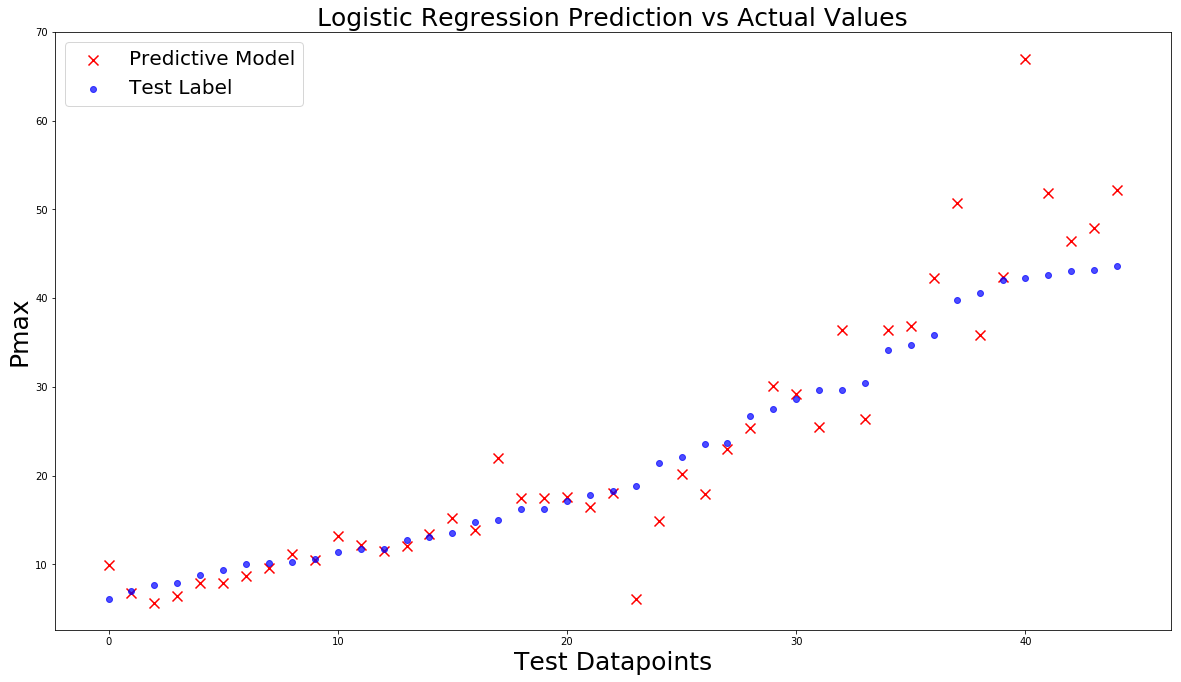

In [30]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Logistic Regression Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("Logistic_Regression_plot.png")